Each sample in the train and test set has the following information:

- The text of a tweet
- A keyword from that tweet (although this may be blank!)
- The location the tweet was sent from (may also be blank)

We are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.


More details about the competition here:
https://www.kaggle.com/c/nlp-getting-started

In [1]:
from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
!cd data && ls

sample_submission.csv test.csv              train.csv


<IPython.core.display.Javascript object>

In [3]:
train = pd.read_csv(f"data/train.csv")
test = pd.read_csv(f"data/test.csv")

<IPython.core.display.Javascript object>

In [4]:
train.head().T

,0,1,2,3,4
id,1,4,5,6,7
keyword,NaN,NaN,NaN,NaN,NaN
location,NaN,NaN,NaN,NaN,NaN
text,Our Deeds are the Reason of this #earthquake M...,Forest fire near La Ronge Sask. Canada,All residents asked to 'shelter in place' are ...,"13,000 people receive #wildfires evacuation or...",Just got sent this photo from Ruby #Alaska as ...
target,1,1,1,1,1


<IPython.core.display.Javascript object>

In [5]:
test.head().T

,0,1,2,3,4
id,0,2,3,9,11
keyword,NaN,NaN,NaN,NaN,NaN
location,NaN,NaN,NaN,NaN,NaN
text,Just happened a terrible car crash,"Heard about #earthquake is different cities, s...","there is a forest fire at spot pond, geese are...",Apocalypse lighting. #Spokane #wildfires,Typhoon Soudelor kills 28 in China and Taiwan


<IPython.core.display.Javascript object>

### EDA

Handling missing values straight from the start.

In [6]:
train.fillna(-99, inplace=True)
test.fillna(-99, inplace=True)

<IPython.core.display.Javascript object>

In [7]:
train.keyword.value_counts()[:5]

-99           61
fatalities    45
armageddon    42
deluge        42
sinking       41
Name: keyword, dtype: int64

<IPython.core.display.Javascript object>

In [8]:
train.location.value_counts()[:5]

-99              2533
USA               104
New York           71
United States      50
London             45
Name: location, dtype: int64

<IPython.core.display.Javascript object>

Plotting the distribution of the target variable.

In [9]:
disasters = train[train.target == 1].shape[0]
non_disasters = train[train.target == 0].shape[0]

<IPython.core.display.Javascript object>

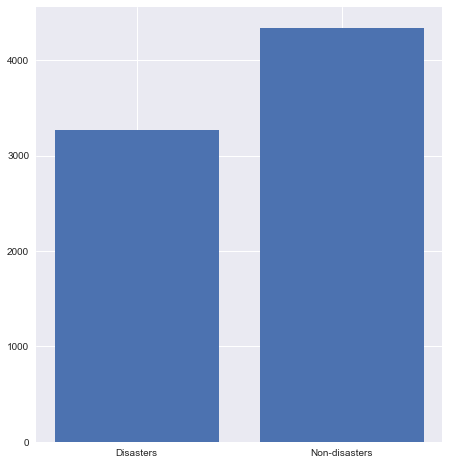

<IPython.core.display.Javascript object>

In [10]:
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
_ = plt.bar(["Disasters", "Non-disasters"], [disasters, non_disasters])

In [11]:
def plot_target_based_features(feature):
    x1 = train[train.target == 1][feature]
    x2 = train[train.target == 0][feature]
    plt.figure(1, figsize=(16, 8))
    plt.subplot(1, 1, 1)
    _ = plt.hist(x2, alpha=0.5, color="grey", bins=50)
    _ = plt.hist(x1, alpha=0.7, color="red", bins=50)

    return _

<IPython.core.display.Javascript object>

Check the number of characters in the text feature.

In [12]:
train["text_len"] = train.text.map(lambda x: len(x))

<IPython.core.display.Javascript object>

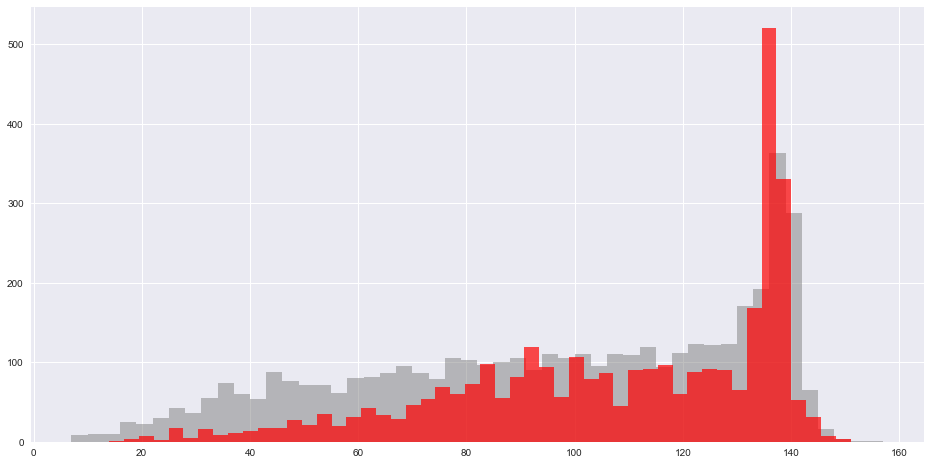

<IPython.core.display.Javascript object>

In [13]:
_ = plot_target_based_features("text_len")

Check the number number of words in the text feature.

In [14]:
train["words_count"] = train.text.str.split().map(lambda x: len(x))

<IPython.core.display.Javascript object>

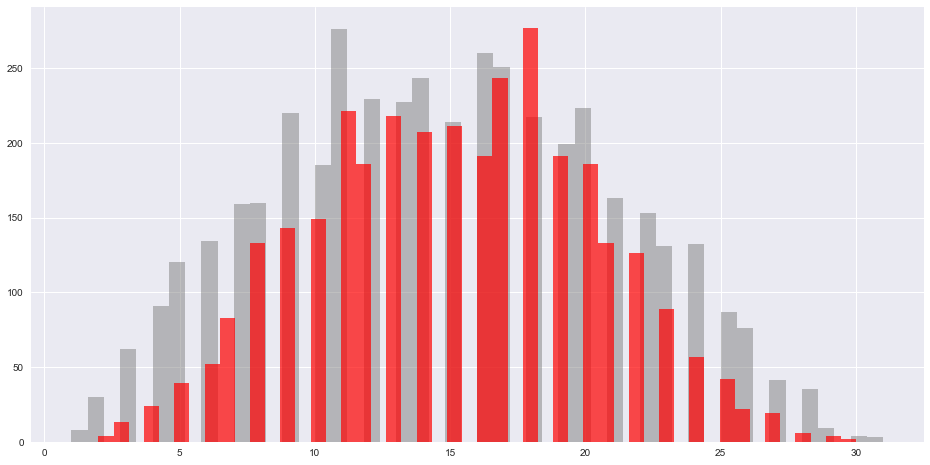

<IPython.core.display.Javascript object>

In [15]:
_ = plot_target_based_features("words_count")

Count the number of unique words

In [16]:
train["unique_word_count"] = train.text.map(lambda x: len(set(str(x).split())))

<IPython.core.display.Javascript object>

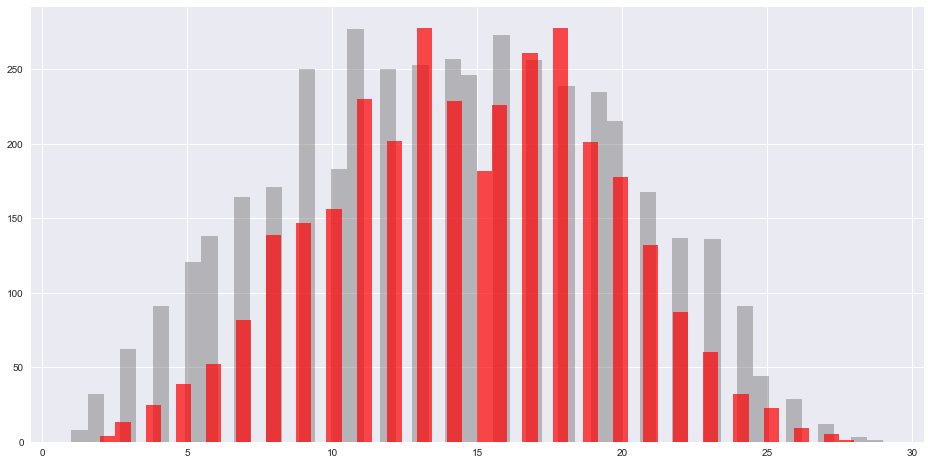

<IPython.core.display.Javascript object>

In [17]:
_ = plot_target_based_features("unique_word_count")

Mean word length

In [20]:
train["mean_word_length"] = train.text.map(
    lambda x: np.mean([len(w) for w in str(x).split()])
)

<IPython.core.display.Javascript object>

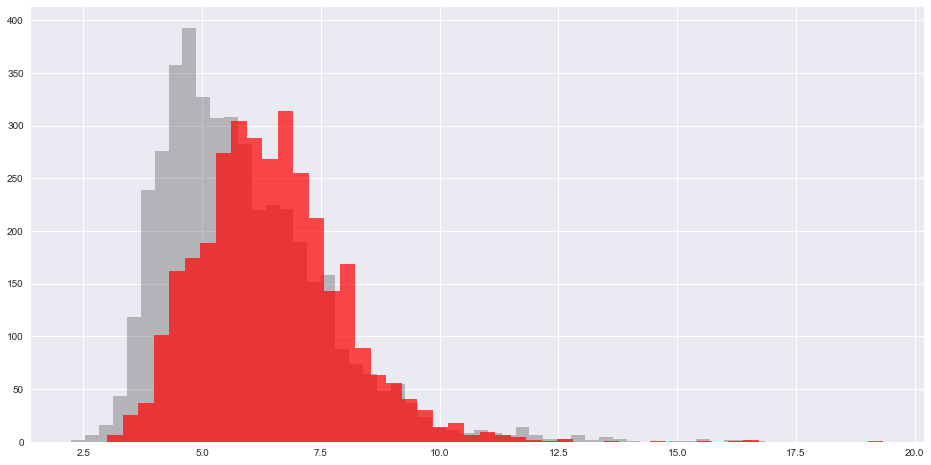

<IPython.core.display.Javascript object>

In [21]:
_ = plot_target_based_features("mean_word_length")

Punctuation count

In [22]:
import string

train["punctuation_count"] = train["text"].map(
    lambda x: len([c for c in str(x) if c in string.punctuation])
)

<IPython.core.display.Javascript object>

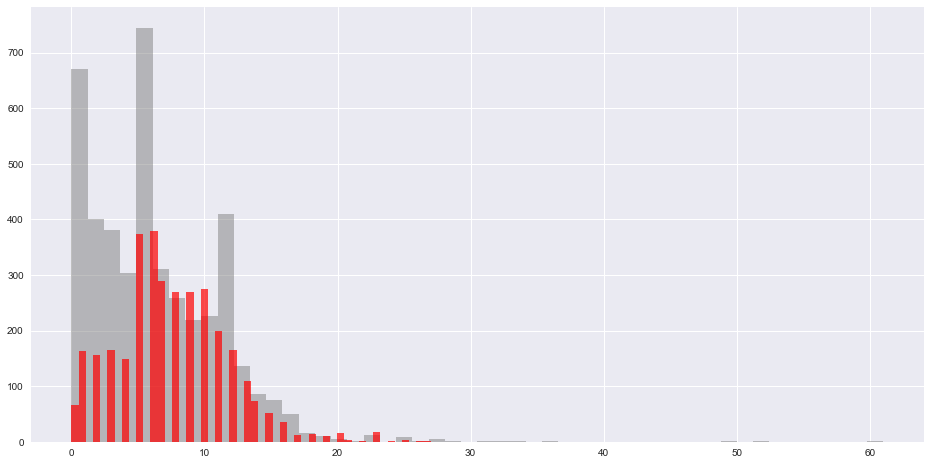

<IPython.core.display.Javascript object>

In [23]:
_ = plot_target_based_features("punctuation_count")

Looking at the plots above we can see that the new generated features have different distributions for the two target categories.

Therefore these features might be useful in models that we can try.